In [550]:

import sys
sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions','load_model_output', 'search_functions', 
              'plot_3D_functions', 'input_veg']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]

from plot_functions import *
from plot_3D_functions import *
from search_functions import *
from load_model_output import *
from input_veg import *

In [551]:
project_dir = "/Users/octavia/Dropbox/SVE_v2/" 

## Current

In [557]:
summary = summarize_param_files(project_dir)
summary.loc[["ncol", "nrow", "imodel", "Ks", "H_i", "veg_type", "topo"]].T


,ncol,nrow,imodel,Ks,H_i,veg_type,topo
test_GW_GA,50,5,1,"[1.0, 2.0, 3.0]","[-0.1, -0.05, 0]",randv,plane
test_veg,80,40,1,1,0,from_file,plane
test_GA_infl,10,20,1,"[1.0, 5.0]","[-0.05, -0.1]",randv,plane
test_topo_gauss,80,40,1,1,0,randv,gaussian
test_GW_phil,50,5,2,"[0.1, 1.0, 2.0, 3.0]",0,randv,plane
test_inflow,40,4,1,"[0.0, 1.0, 2.0, 4.0, 6.0]",0,randv,plane
test_topo,80,40,1,1,0,randv,from_file
test_stripe,30,5,1,1,-0.1,stripe,plane
test_2by2,2,2,1,0,0,randv,plane


## Chose a case


In [558]:
base_name = "test_topo_gauss"
base_name = "test_stripe"
base_dir = os.path.join(project_dir, 'model_output/', base_name )


In [559]:
print_input_params(base_dir, [ 'ncol', 'nrow', 'tr', 'dt_print'])

batch:
	p : 5.0
sim:
	fV : 0.2, 0.8, 0.2
common:
	H_i : -0.1
	ncol : 30
	nrow : 5
	tr : 5
	dt_print : 10


In [560]:
core = load_sims(base_dir)
# core = patchy_update(core)

In [561]:
core[['t_final', 'runtime_hr']]

,t_final,runtime_hr
p-5.0/fV-0.6/,1200,0.004635
p-5.0/fV-0.8/,761,0.002741
p-5.0/fV-0.2/,1200,0.005571
p-5.0/fV-0.4/,1200,0.005365


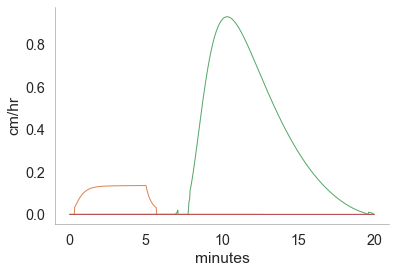

In [562]:
fig = plot_hydrographs(core[:4])

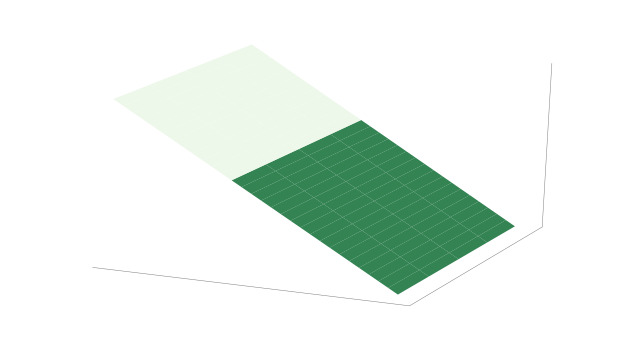

In [650]:
sim = core.iloc[0]
plot_3D_veg(sim);

In [478]:
sim = core.iloc[0]
if sim.fV < 1:
    triptych(sim)

In [ ]:
# TODO: add a redirect from triptchy for microtopgoraphy

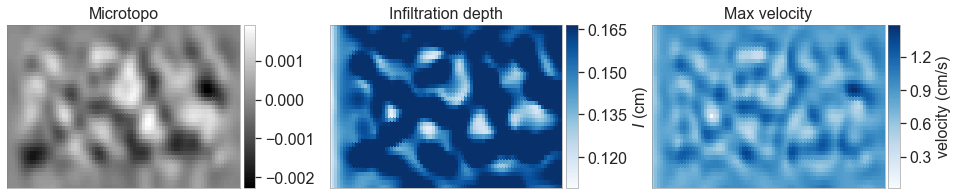

In [480]:
if sim.topo != "plane":
        triptych_micro(sim)

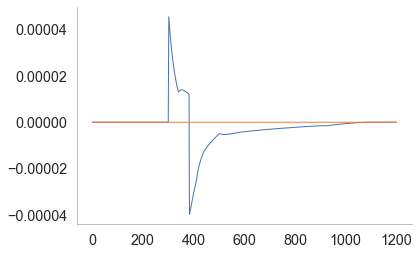

In [651]:
plt.plot(sim.flux1)
plt.plot(sim.flux3)

# plt.plot(sim.flux2)
# plt.plot(sim.flux4)